In [1]:
import statistics
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
class Individual():  
    def __init__(self, chromosome,Fitness):
        self.chromosome = chromosome 
        self.fitness = Fitness
  


In [3]:
import sys
def create_gnome(problemSize):

    #create chromosome or string of genes
    Gene=[0,1]
    gene=[]
    g=[1,1,1,1,1,1,1,1,1,1]
    
    for i in range (problemSize):
        gene.append(random.choice(Gene))
    
    return gene
  
def cal_fitness(chromosome,FuncFitness,T):
    global Fitness_Count
    Fitness_Count=Fitness_Count+1
    #Calculate fitness score, it is the number of characters in string which differ from target string.
    fitness = FuncFitness(chromosome,T)
    return fitness
def cal_fitness_Numerical(chromosome,FuncFitness,rightGene):
    global Fitness_Count
    Fitness_Count=Fitness_Count+1
    #Calculate fitness score, it is the number of characters in string which differ from target string.
    fitness = FuncFitness(chromosome,rightGene)
    return fitness    
    #Fitness Functions
def OneMax(slt,T):
    s=0
    for i in slt:
        s+=int(i)
    return s
def Peak( slt,T):
    mul_r=1
    for i in slt:
        if i==0:
            mul_r=0
            break    
    return mul_r
def FlipFlop(slt,T):
    res=0
    for i in range(len(slt)-1):
        res+=(slt[i]^slt[i+1])
    return res

def tail(slt,n):
    cn=0
    for i in reversed(slt):
        if i==n:
            cn+=1
        else:
            break
    return cn
    
    
def head(slt,n):
    cn=0
    for i in slt:
        if i==n:
            cn+=1
        else:
            break
    return cn
def FourPeaksR(slt,T):
    if (tail(slt,0)>T and head(slt,1)>T):
        return len(slt)
    else:
        return 0
def SixPeaksR(slt,T):
    if (tail(slt,0)>T and head(slt,1)>T) or (tail(slt,1)>T and head(slt,0)>T):
        return len(slt)
    else:
        return 0
def FourPeaks(slt,T):
    return max(tail(slt,0),head(slt,1))+FourPeaksR(slt,T)
def SixPeaks(slt,T):
    return max(tail(slt,0),head(slt,1))+SixPeaksR(slt,T)
def Trap(slt,T):
    return (3*(len(slt))*Peak(slt,T))-OneMax(slt,T)
    
def CalProbability(slt,p_final):
    p=0
    p=slt.fitness/p_final
    return p
       
     
def Fitness_Proportionate(population,ParentsPool):
    p_final=sys.float_info.epsilon

    ParentsPool=[]
    for j in population:
        p_final+=(j.fitness)
    prob=[]
    for slt in population:
        pslt=CalProbability(slt,p_final)
        prob.append(pslt)

    newProbList=CumulativeProb(prob)
        
    for i in range(len(population)):
        r=random.random()
        if r>=0 and r<=newProbList[0]:
            par=population[0]

        elif r>=newProbList[len(newProbList)-1] and r<=1:
            par=population[len(newProbList)-1]


        else:
            for i in range((len(newProbList))-1):
                if r>newProbList[i] and r<=newProbList[i+1]:
                    par=population[i+1]                  
        ParentsPool.append(par)
    return ParentsPool    
        
def CumulativeProb(prob):
    newProbList=[]
    su=0
    for i in range(len(prob)):
        su+=prob[i]
        newProbList.append(su)
    return newProbList
                            
def Binary_Tournament(population,ParentsPool):
    ParentsPool = []
    for i in range(len(population)):
        par1=random.choice(population)
        par2=random.choice(population)
        if par1.fitness>=par2.fitness:
            ParentsPool.append( par1)
        else:
            ParentsPool.append( par2)
    return ParentsPool    
def SinglePointCrossover(par1,par2,Pc,lg):  
    children=[]
    pcrand=random.random()
    if pcrand>=0 and pcrand<Pc:
        crossindex=random.randint(0,problemSize)
        child1=par1.chromosome[:crossindex]+par2.chromosome[crossindex:]
        child2=par2.chromosome[:crossindex]+par1.chromosome[crossindex:]
    else:
        child1=par1.chromosome
        child2=par2.chromosome
    children.append(child1)
    children.append(child2)
    return children

def UniformCrossover(par1,par2,Pc,lg):
    lgene=lg
    children=[]
    child1=[]
    child2=[]
    for i in range(problemSize):
        r=random.random()
        if r>=0 and r<Pc:
            child1.append(par1.chromosome[i] )
            child2.append(par2.chromosome[i])
        else :
            child2.append(par1.chromosome[i])
            child1.append(par2.chromosome[i])
    children.append(child1)
    children.append(child2)
    return children

def BinaryMutation(child, Pm):
    for i in child:
        randPm=random.random()
        if randPm>0 and randPm<Pm:
            if i==0:
                i=1
            else:
                i=0
    return child

def NumericalMutation(child,Pm):
    lgene=[0,9]
    for i in child:
        randPm=random.random()
        if randPm>0 and randPm<Pm:
            randCreep=random.choice(lgene)
            i=randCreep
    return child
def NumericalF1(slt,rightGene):
    if slt==rightGene:
        return 1
    else:
        return 0

def NumericalF2(slt,rightGene):
    fit=0
    for i in range(len(slt)):
        if slt[i]==rightGene[i]:
            fit+=1
    return fit

def NumericalF3(slt,rightGene):
    score=0
    for i in range(len(slt)):
        a=rightGene[i]-slt[i]
        if a>0:
            score+=a
        else:
            a= 0 - a
            score+=a
    return score
        

In [4]:
import random
population=[]
popSize=0
problemSize=0
FuncFitness=OneMax
ParentspoolFunc=Binary_Tournament
CrossOverFunc=SinglePointCrossover
MutationFunc=BinaryMutation
T=0
Gene=[0,1]
ParentsPool=[]
Fitness_Count=0

In [5]:

def setGlobal(pSize,problemS,funcfit,parentspoolFunc,CrossFunc,t,gen,bestFitness,MutationFunc1,pm,pc,ch,chkind):
    global population
    global ParentsPool
    global Fitness_Count
    global T
    popSize=pSize
    problemSize=problemS
    FuncFitness=funcfit
    ParentspoolFunc=parentspoolFunc
    CrossOverFunc=CrossFunc
    T=t
    Gene=gen
    generation = 1
    MutationFunc=MutationFunc1
    ParentsPool=[]
    found = False
    Pc=pc
    Pm=pm
    Fitness_C=[]
    b_Fitness=[]
    for i in range(10):
        found = False

        generation=1

        Fitness_Count=0
        # create initial population
        for i in range(popSize):
            
            gnome = create_gnome(problemSize)
            fitnes=cal_fitness(gnome,FuncFitness,T)

            population.append(Individual(gnome,fitnes))
        
        while (not found) :
            if (generation==301):
                break
            
            for g in population:
                if g.fitness==bestFitness:
                    found=True
                    bestGene=g
                    break
            if found==True:
                Fitness_C.append(Fitness_Count)
                b_Fitness.append(bestGene.fitness)
                

                break
            ParentsPool=[]
            ParentsPool = ParentspoolFunc(population,ParentsPool)

            random.shuffle(ParentsPool)
            new_generation=[]
            for i in range(int(pSize/2)):
                par1=ParentsPool[i]
                par2=ParentsPool[len(ParentsPool)-i-1]
                Children=CrossOverFunc(par1,par2,Pc,Gene)
                Children[0]=MutationFunc(Children[0],Pm)
                Children[1]=MutationFunc(Children[1],Pm)
                fitnes0=cal_fitness(Children[0],FuncFitness,T)
                fitnes1=cal_fitness(Children[1],FuncFitness,T)
                population.append(Individual(Children[0],fitnes))
                population.append(Individual(Children[1],fitnes))

  
            population = sorted(population, key = lambda x:x.fitness)
            population=population[int(popSize/2):popSize]
            random.shuffle(population)

            generation = generation + 1
        
        if found==False:
            population = sorted(population, key = lambda x:x.fitness)
            population.reverse()
            bestGene=population[0] 
            Fitness_C.append(Fitness_Count)
            b_Fitness.append(bestGene.fitness)
            
    print("\n"+ch + " = " + str(chkind) )
    print('Best Fitness List = '+str(b_Fitness))
    print('Count Fitness List = '+str(Fitness_C))
    best_fitness_avg=sum(b_Fitness)/10

    Fitness_count_avg=sum(Fitness_C)/10 
    
    Fitness_count_stdv=statistics.stdev(Fitness_C)
    best_fitness_stdv=statistics.stdev(b_Fitness)
    
    print('Fitness_count_avg: ' + str(Fitness_count_avg))
    print('best_fitness_avg: ' + str(best_fitness_avg))
    print('Fitness_count_stdv: ' + str(Fitness_count_stdv))
    print('best_fitness_stdv: ' + str(best_fitness_stdv))
    list_output=[]
    list_output.append(Fitness_count_avg)
    list_output.append(best_fitness_avg)
    list_output.append(Fitness_count_stdv)
    list_output.append(best_fitness_stdv)
    return list_output
    




    
   

In [6]:

def setGlobalNumerical(pSize,problemS,funcfit,parentspoolFunc,CrossFunc,gen,bestFitness,MutationFunc1,pm,pc,RightGene,ch, chkind):
    global population
    global ParentsPool
    global Fitness_Count
    popSize=pSize
    problemSize=problemS
    FuncFitness=funcfit
    ParentspoolFunc=parentspoolFunc
    CrossOverFunc=CrossFunc
    
    Gene=gen
    generation = 1
    MutationFunc=MutationFunc1
    ParentsPool=[]
    found = False
    Pc=pc
    Pm=pm
    Fitness_C=[]
    b_Fitness=[]
    rightGene=RightGene
    for i in range(10):
        found = False

        generation=1

        #print('turn:'+str(i))
        
        Fitness_Count=0
        # create initial population
        for i in range(popSize):
            
            gnome = create_gnome(problemSize)
            fitnes=cal_fitness_Numerical(gnome,FuncFitness,rightGene)

            population.append(Individual(gnome,fitnes))
        
        while (not found) :
            if (generation==301):
                break
            
            for g in population:
                if g.fitness==bestFitness:
                    found=True
                    bestGene=g
                    break
            if found==True:
                Fitness_C.append(Fitness_Count)
                b_Fitness.append(bestGene.fitness)
                

                break
            #Set Parents Pool
            ParentsPool=[]
            ParentsPool = ParentspoolFunc(population,ParentsPool)

            random.shuffle(ParentsPool)
            #print(ParentsPool)
            new_generation=[]
            for i in range(int(pSize/2)):
                par1=ParentsPool[i]
                par2=ParentsPool[len(ParentsPool)-i-1]
                Children=CrossOverFunc(par1,par2,Pc,Gene)
                Children[0]=MutationFunc(Children[0],Pm)
                Children[1]=MutationFunc(Children[1],Pm)
                fitnes0=cal_fitness_Numerical(Children[0],FuncFitness,rightGene)
                fitnes1=cal_fitness_Numerical(Children[1],FuncFitness,rightGene)
                population.append(Individual(Children[0],fitnes))
                population.append(Individual(Children[1],fitnes))

                

           
            population = sorted(population, key = lambda x:x.fitness)
            population=population[int(popSize/2):popSize]
            random.shuffle(population)

            generation = generation + 1
        
        if found==False:
            population = sorted(population, key = lambda x:x.fitness)
            population.reverse()
            bestGene=population[0] 
            Fitness_C.append(Fitness_Count)
            b_Fitness.append(bestGene.fitness)
            #print('generation: ')
            #print(generation)
            #print('best gene fitness: ')
            #print(bestGene.fitness)
            #print('best gene chromosome: ')
            #print(bestGene.chromosome)
    print("\n"+ch+" = " + str(chkind))   
    print('Best Fitness List = '+str(b_Fitness))
    print('Count Fitness List = '+str(Fitness_C))
    best_fitness_avg=sum(b_Fitness)/10

    Fitness_count_avg=sum(Fitness_C)/10 
    
    Fitness_count_stdv=statistics.stdev(Fitness_C)
    best_fitness_stdv=statistics.stdev(b_Fitness)
    
    print('Fitness_count_avg: ' + str(Fitness_count_avg))
    print('best_fitness_avg: ' + str(best_fitness_avg))
    print('Fitness_count_stdv: ' + str(Fitness_count_stdv))
    print('best_fitness_stdv: ' + str(best_fitness_stdv))
    list_output=[]
    list_output.append(Fitness_count_avg)
    list_output.append(best_fitness_avg)
    list_output.append(Fitness_count_stdv)
    list_output.append(best_fitness_stdv)
    return list_output
    

    #print("Generation: {}\tString: {}\tFitness: {}".\ format(generation, "".join(population[0].chromosome), population[0].fitness))



    
   

In [7]:
def DrawPlot_BestFitnessAVG(avgbestfitlist,z,xl):
    width = 0.2
    plt.figure(figsize=[4,5])
    plt.bar( z,avgbestfitlist, width, color='purple')
   
    plt.xlabel(xl)
    plt.ylabel("Average of Best Fitness ")
    plt.show()
    plt.savefig('s1_Binary.jpg')

#1
#current generation
#setGlobal(pSize,problemS,funcfit,ParentspoolFunc,CrossFunc,t,gen,bestFitness,MutationFunc,Pm,Pc):
x=[]
x.append(setGlobal(200,10,OneMax,Binary_Tournament,SinglePointCrossover,1,[0,1],10,BinaryMutation,pm=0.5 , pc=0.7 , ch="Population Size" , chkind=10 ))
x.append(setGlobal(200,30,FlipFlop,Binary_Tournament,SinglePointCrossover,3,[0,1],29,BinaryMutation,pm=0.5 , pc=0.7,ch="Population Size" , chkind=30))
x.append(setGlobal(200,50,FlipFlop,Binary_Tournament,SinglePointCrossover,5,[0,1],49,BinaryMutation,pm=0.5 , pc=0.7,ch="Population Size" , chkind=50))
x.append(setGlobal(200,100,FlipFlop,Binary_Tournament,SinglePointCrossover,10,[0,1],99,BinaryMutation,pm=0.5 , pc=0.7,ch="Population Size" , chkind=100))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])
DrawPlot_BestFitnessAVG(avgbestfitlist,z=['10','30','50','100'] , xl="Population Size")


#2
x=[]
x.append(setGlobal(100,10,FlipFlop,Binary_Tournament,UniformCrossover,1,[0,1],9,BinaryMutation,pm=0.1 , pc=1 ,  ch="Population Size" , chkind=10))
x.append(setGlobal(100,30,FlipFlop,Binary_Tournament,UniformCrossover,3,[0,1],29,BinaryMutation,pm=0.1 , pc=1, ch="Population Size" , chkind=30))
x.append(setGlobal(100,50,FlipFlop,Binary_Tournament,UniformCrossover,5,[0,1],49,BinaryMutation,pm=0.1 , pc=1,ch= "Population Size" , chkind=50))
x.append(setGlobal(100,100,FlipFlop,Binary_Tournament,UniformCrossover,10,[0,1],99,BinaryMutation,pm=0.1 , pc=1,ch= "Population Size" , chkind=100))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['10','30','50','100'] , xl='Population Size')



#3
x=[]
x.append(setGlobal(50,50,FlipFlop,Binary_Tournament,UniformCrossover,5,[0,1],49,BinaryMutation,pm=0.05 , pc=0.7, ch="PopSize" , chkind=50))
x.append(setGlobal(100,50,FlipFlop,Binary_Tournament,UniformCrossover,5,[0,1],49,BinaryMutation,pm=0.05 , pc=0.7, ch="Pop Size" , chkind=100))
x.append(setGlobal(200,50,FlipFlop,Binary_Tournament,UniformCrossover,5,[0,1],49,BinaryMutation,pm=0.05 , pc=0.7, ch="Pop Size" , chkind=200))
x.append(setGlobal(300,50,FlipFlop,Binary_Tournament,UniformCrossover,5,[0,1],49,BinaryMutation,pm=0.05 , pc=0.7, ch="Pop Size" , chkind=300))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['50','100','200','300'],xl="Pop Size")


#4
x=[]
x.append(setGlobal(50,30,FlipFlop,Fitness_Proportionate,UniformCrossover,3,[0,1],29,BinaryMutation,pm=0.3 , pc=0.5 ,ch="Pop Size" , chkind=50))
x.append(setGlobal(100,30,FlipFlop,Fitness_Proportionate,UniformCrossover,3,[0,1],29,BinaryMutation,pm=0.3 , pc=0.5,ch="Pop Size" , chkind=100))
x.append(setGlobal(200,30,FlipFlop,Fitness_Proportionate,UniformCrossover,3,[0,1],29,BinaryMutation,pm=0.3 , pc=0.5,ch="Pop Size" , chkind=200))
x.append(setGlobal(300,30,FlipFlop,Fitness_Proportionate,UniformCrossover,3,[0,1],29,BinaryMutation,pm=0.3 , pc=0.5,ch="Pop Size" , chkind=300))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['50','100','200','300'],xl="Pop Size")


#5
#setGlobal(pSize,problemS,funcfit,ParentspoolFunc,CrossFunc,t,gen,bestFitness,MutationFunc,Pm,Pc)
x=[]
x.append(setGlobal(50,10,FlipFlop,Binary_Tournament,SinglePointCrossover,1,[0,1],9,BinaryMutation,pm=0.3 , pc=0.5 ,ch="Pc" , chkind=0.5))
x.append(setGlobal(50,10,FlipFlop,Binary_Tournament,SinglePointCrossover,1,[0,1],9,BinaryMutation,pm=0.3 , pc=0.7,ch="Pc", chkind=0.7))
x.append(setGlobal(50,10,FlipFlop,Binary_Tournament,SinglePointCrossover,1,[0,1],9,BinaryMutation,pm=0.3 , pc=0.9,ch="Pc" , chkind=0.9))
x.append(setGlobal(50,10,FlipFlop,Binary_Tournament,SinglePointCrossover,1,[0,1],9,BinaryMutation,pm=0.3 , pc=1,ch="Pc" , chkind=1))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.5' , '0.7' , '0.9' , '1'] , xl="Pc")


#6
#setGlobal(pSize,problemS,funcfit,ParentspoolFunc,CrossFunc,t,gen,bestFitness,MutationFunc,Pm,Pc)
x=[]
x.append(setGlobal(300,50,FlipFlop,Fitness_Proportionate,SinglePointCrossover,5,[0,1],49,BinaryMutation,pm=0.1 , pc=0.5 ,ch="Pc" , chkind=0.5))
x.append(setGlobal(300,50,FlipFlop,Fitness_Proportionate,SinglePointCrossover,5,[0,1],49,BinaryMutation,pm=0.1 , pc=0.7,ch="Pc", chkind=0.7))
x.append(setGlobal(300,50,FlipFlop,Fitness_Proportionate,SinglePointCrossover,5,[0,1],49,BinaryMutation,pm=0.1 , pc=0.9,ch="Pc" , chkind=0.9))
x.append(setGlobal(300,50,FlipFlop,Fitness_Proportionate,SinglePointCrossover,5,[0,1],49,BinaryMutation,pm=0.1 , pc=1,ch="Pc" , chkind=1))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.5' , '0.7' , '0.9' , '1'] , xl="Pc")



Pm = 0.05
Best Fitness List = [49, 53, 48, 50, 45, 48, 57, 43, 50, 42]
Count Fitness List = [60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200]
Fitness_count_avg: 60200.0
best_fitness_avg: 48.5
Fitness_count_stdv: 0.0
best_fitness_stdv: 4.503085362035432

Pm = 0.1
Best Fitness List = [51, 52, 41, 45, 45, 49, 59, 55, 51, 57]
Count Fitness List = [60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200]
Fitness_count_avg: 60200.0
best_fitness_avg: 50.5
Fitness_count_stdv: 0.0
best_fitness_stdv: 5.681353516353104

Pm = 0.3
Best Fitness List = [50, 55, 57, 48, 56, 49, 45, 47, 52, 53]
Count Fitness List = [60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200]
Fitness_count_avg: 60200.0
best_fitness_avg: 51.2
Fitness_count_stdv: 0.0
best_fitness_stdv: 4.049691346263317

Pm = 0.5
Best Fitness List = [52, 49, 43, 55, 51, 48, 45, 62, 41, 49]
Count Fitness List = [60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200, 60200]
Fitness_count_

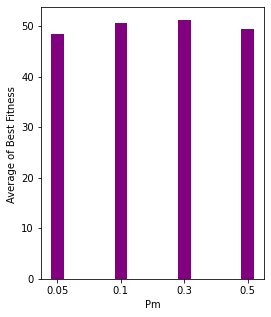

<Figure size 432x288 with 0 Axes>

In [8]:
#7
x=[]
x.append(setGlobal(200,100,OneMax,Fitness_Proportionate,UniformCrossover,10,[0,1],100,BinaryMutation,pm=0.05 , pc=0.9,ch="Pm" , chkind=0.05))
x.append(setGlobal(200,100,OneMax,Fitness_Proportionate,UniformCrossover,10,[0,1],100,BinaryMutation,pm=0.1 , pc=0.9,ch="Pm" , chkind=0.1))
x.append(setGlobal(200,100,OneMax,Fitness_Proportionate,UniformCrossover,10,[0,1],100,BinaryMutation,pm=0.3 , pc=0.9,ch="Pm" , chkind=0.3))
x.append(setGlobal(200,100,OneMax,Fitness_Proportionate,UniformCrossover,10,[0,1],100,BinaryMutation,pm=0.5 , pc=0.9,ch="Pm" , chkind=0.5))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.05' , '0.1' , '0.3' , '0.5'] , xl="Pm")



Pm = 0.05
Best Fitness List = [12, 16, 15, 19, 11, 17, 18, 10, 17, 15]
Count Fitness List = [30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100]
Fitness_count_avg: 30100.0
best_fitness_avg: 15.0
Fitness_count_stdv: 0.0
best_fitness_stdv: 3.0550504633038935

Pm = 0.1
Best Fitness List = [8, 19, 15, 16, 19, 16, 17, 12, 11, 16]
Count Fitness List = [30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100]
Fitness_count_avg: 30100.0
best_fitness_avg: 14.9
Fitness_count_stdv: 0.0
best_fitness_stdv: 3.5418137224371984

Pm = 0.3
Best Fitness List = [13, 15, 12, 15, 14, 13, 13, 14, 15, 15]
Count Fitness List = [30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100]
Fitness_count_avg: 30100.0
best_fitness_avg: 13.9
Fitness_count_stdv: 0.0
best_fitness_stdv: 1.1005049346146119

Pm = 0.5
Best Fitness List = [16, 15, 13, 15, 13, 21, 12, 18, 15, 11]
Count Fitness List = [30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100, 30100]
Fitness_coun

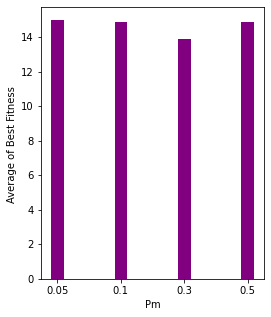

<Figure size 432x288 with 0 Axes>

In [9]:
#8
x=[]
x.append(setGlobal(100,30,FlipFlop,Fitness_Proportionate,SinglePointCrossover,3,[0,1],29,BinaryMutation,pm=0.05 ,pc=0.5,ch="Pm" , chkind=0.05))
x.append(setGlobal(100,30,FlipFlop,Fitness_Proportionate,SinglePointCrossover,3,[0,1],29,BinaryMutation,pm=0.1 , pc=0.5,ch="Pm" , chkind=0.1))
x.append(setGlobal(100,30,FlipFlop,Fitness_Proportionate,SinglePointCrossover,3,[0,1],29,BinaryMutation,pm=0.3 , pc=0.5,ch="Pm" , chkind=0.3))
x.append(setGlobal(100,30,FlipFlop,Fitness_Proportionate,SinglePointCrossover,3,[0,1],29,BinaryMutation,pm=0.5 , pc=0.5,ch="Pm" , chkind=0.5))

avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.05' , '0.1' , '0.3' , '0.5'] , xl="Pm")



Selection Method = <function Fitness_Proportionate at 0x000001792B8555E0>
Best Fitness List = [5, 4, 4, 5, 9, 9, 9, 9, 9, 9]
Count Fitness List = [15050, 15050, 15050, 15050, 50, 50, 50, 50, 50, 50]
Fitness_count_avg: 6050.0
best_fitness_avg: 7.2
Fitness_count_stdv: 7745.966692414834
best_fitness_stdv: 2.3475755815545347

Selection Method = <function Binary_Tournament at 0x000001792B855700>
Best Fitness List = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Count Fitness List = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Fitness_count_avg: 50.0
best_fitness_avg: 9.0
Fitness_count_stdv: 0.0
best_fitness_stdv: 0.0


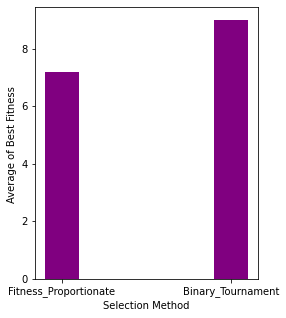

<Figure size 432x288 with 0 Axes>

In [10]:
#9
x=[]
x.append(setGlobal(50,10,FlipFlop,Fitness_Proportionate,UniformCrossover,1,[0,1],9,BinaryMutation,pm=0.05 , pc=1,ch="Selection Method" , chkind=Fitness_Proportionate))
x.append(setGlobal(50,10,FlipFlop,Binary_Tournament,UniformCrossover,1,[0,1],9,BinaryMutation,pm=0.05 , pc=1,ch="Selection Method" , chkind=Binary_Tournament))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,xl='Selection Method' , z=['Fitness_Proportionate','Binary_Tournament'])



Selecion Method = <function Fitness_Proportionate at 0x000001792B8555E0>
Best Fitness List = [25, 19, 27, 34, 21, 26, 24, 26, 29, 20]
Count Fitness List = [90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300]
Fitness_count_avg: 90300.0
best_fitness_avg: 25.1
Fitness_count_stdv: 0.0
best_fitness_stdv: 4.483302354291979

Selecion Method = <function Binary_Tournament at 0x000001792B855700>
Best Fitness List = [24, 26, 26, 22, 22, 22, 21, 23, 28, 20]
Count Fitness List = [90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300]
Fitness_count_avg: 90300.0
best_fitness_avg: 23.4
Fitness_count_stdv: 0.0
best_fitness_stdv: 2.5473297566057065


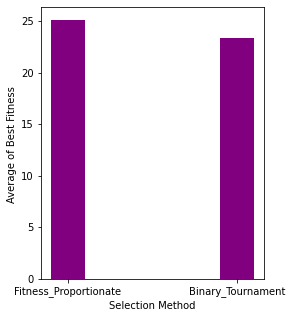

<Figure size 432x288 with 0 Axes>

In [11]:
#10
x=[]
x.append(setGlobal(300,50,FlipFlop,Fitness_Proportionate,SinglePointCrossover,5,[0,1],49,BinaryMutation,pm=0.5 , pc=0.7,ch="Selecion Method", chkind=Fitness_Proportionate))
x.append(setGlobal(300,50,FlipFlop,Binary_Tournament,SinglePointCrossover,5,[0,1],49,BinaryMutation,pm=0.5 , pc=0.7,ch="Selecion Method",chkind=Binary_Tournament))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,xl='Selection Method' , z=['Fitness_Proportionate','Binary_Tournament'])



Recombination Method = <function SinglePointCrossover at 0x000001792B855790>
Best Fitness List = [52, 56, 47, 55, 47, 46, 48, 50, 46, 41]
Count Fitness List = [90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300]
Fitness_count_avg: 90300.0
best_fitness_avg: 48.8
Fitness_count_stdv: 0.0
best_fitness_stdv: 4.541169697580373

Recombination Method = <function UniformCrossover at 0x000001792B855820>
Best Fitness List = [50, 45, 49, 45, 54, 49, 46, 48, 47, 46]
Count Fitness List = [90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300, 90300]
Fitness_count_avg: 90300.0
best_fitness_avg: 47.9
Fitness_count_stdv: 0.0
best_fitness_stdv: 2.766867462592951


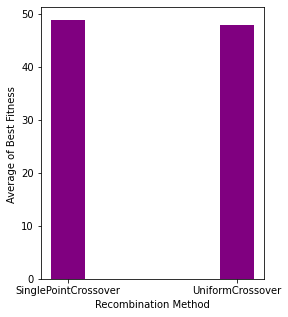

<Figure size 432x288 with 0 Axes>

In [12]:
#11
x=[]
x.append(setGlobal(300,100,FlipFlop,Binary_Tournament,SinglePointCrossover,10,[0,1],99,BinaryMutation,pm=0.1 , pc=1 , ch="Recombination Method",chkind=SinglePointCrossover))
x.append(setGlobal(300,100,FlipFlop,Binary_Tournament,UniformCrossover,10,[0,1],99,BinaryMutation,pm=0.1 , pc=1,ch="Recombination Method",chkind=UniformCrossover))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,xl='Recombination Method' , z=['SinglePointCrossover','UniformCrossover'])



Recombination Method = <function SinglePointCrossover at 0x000001792B855790>
Best Fitness List = [15, 18, 18, 17, 12, 15, 20, 16, 14, 13]
Count Fitness List = [15050, 15050, 15050, 15050, 15050, 15050, 15050, 15050, 15050, 15050]
Fitness_count_avg: 15050.0
best_fitness_avg: 15.8
Fitness_count_stdv: 0.0
best_fitness_stdv: 2.485513584307633

Recombination Method = <function UniformCrossover at 0x000001792B855820>
Best Fitness List = [15, 16, 10, 10, 15, 16, 14, 17, 16, 19]
Count Fitness List = [15050, 15050, 15050, 15050, 15050, 15050, 15050, 15050, 15050, 15050]
Fitness_count_avg: 15050.0
best_fitness_avg: 14.8
Fitness_count_stdv: 0.0
best_fitness_stdv: 2.859681411936962


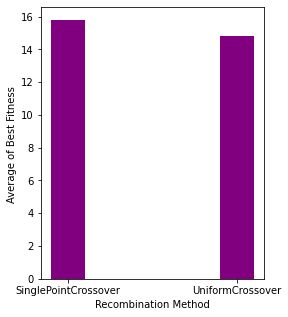

<Figure size 432x288 with 0 Axes>

In [13]:
#12
x=[]
x.append(setGlobal(50,30,FlipFlop,Fitness_Proportionate,SinglePointCrossover,3,[0,1],29,BinaryMutation,pm=0.3 , pc=0.9 , ch="Recombination Method",chkind=SinglePointCrossover))
x.append(setGlobal(50,30,FlipFlop,Fitness_Proportionate,UniformCrossover,3,[0,1],29,BinaryMutation,pm=0.3 , pc=0.9 , ch="Recombination Method",chkind=UniformCrossover))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,xl='Recombination Method' , z=['SinglePointCrossover','UniformCrossover'])


#1
x=[]
x.append(setGlobalNumerical(pSize=100,problemS=5,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.7,RightGene=[4,0,1,3,6],ch="Population Size" , chkind=5))

x.append(setGlobalNumerical(pSize=100,problemS=7,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.7,RightGene=[4,0,1,3,6,1,4],ch="Population Size" , chkind=7))

x.append(setGlobalNumerical(pSize=100,problemS=10,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Population Size" , chkind=10))

x.append(setGlobalNumerical(pSize=100,problemS=15,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Population Size" , chkind=15))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['10','30','50','100'] , xl="Population Size")

#2
x=[]
x.append(setGlobalNumerical(pSize=200,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.1,pc=1,RightGene=[4,0,1,3,6],ch="Population Size" , chkind=10))

x.append(setGlobalNumerical(pSize=200,problemS=7,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.1,pc=1,RightGene=[4,0,1,3,6,1,4],ch="Population Size" , chkind=10))

x.append(setGlobalNumerical(pSize=200,problemS=10,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.1,pc=1,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Population Size" , chkind=10))

x.append(setGlobalNumerical(pSize=200,problemS=15,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.1,pc=1,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Population Size" , chkind=10))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['10','30','50','100'] , xl="Population Size")

#3
x=[]
x.append(setGlobalNumerical(pSize=50,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=0.5,RightGene=[4,0,1,3,6],ch="Pop Size" , chkind=50))

x.append(setGlobalNumerical(pSize=100,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.05,pc=0.5,RightGene=[4,0,1,3,6],ch="Pop Size" , chkind=100))

x.append(setGlobalNumerical(pSize=200,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=0.5,RightGene=[4,0,1,3,6],ch="Pop Size" , chkind=200))

x.append(setGlobalNumerical(pSize=300,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=0.5,RightGene=[4,0,1,3,6],ch="Pop Size" , chkind=300))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['50','100','200','300'] , xl="Pop Size")

#4
x=[]
x.append(setGlobalNumerical(pSize=50,problemS=15,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=1,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pop Size" , chkind=50))

x.append(setGlobalNumerical(pSize=100,problemS=15,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.3,pc=1,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pop Size" , chkind=100))

x.append(setGlobalNumerical(pSize=200,problemS=15,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=1,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pop Size" , chkind=200))

x.append(setGlobalNumerical(pSize=300,problemS=15,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=1,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pop Size" , chkind=300))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['50','100','200','300'] , xl="Pop Size")

#5
x=[]
x.append(setGlobalNumerical(pSize=200,problemS=10,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.5,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Pc" , chkind=0.5))

x.append(setGlobalNumerical(pSize=200,problemS=10,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.5,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Pc" , chkind=0.7))

x.append(setGlobalNumerical(pSize=200,problemS=10,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.9,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Pc" , chkind=0.9))

x.append(setGlobalNumerical(pSize=200,problemS=10,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=1,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Pc" , chkind=1))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.5','0.7','0.9','1'] , xl="Pc")

#6
x=[]
x.append(setGlobalNumerical(pSize=50,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=0.5,RightGene=[4,0,1,3,5],ch="Pc" , chkind=0.5))

x.append(setGlobalNumerical(pSize=50,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.3,pc=0.7,RightGene=[4,0,1,3,5],ch="Pc" , chkind=0.7))

x.append(setGlobalNumerical(pSize=50,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=0.9,RightGene=[4,0,1,3,5],ch="Pc" , chkind=0.9))

x.append(setGlobalNumerical(pSize=50,problemS=5,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=1,RightGene=[4,0,1,3,5],ch="Pc" , chkind=1))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.5','0.7','0.9','1'] , xl="Pc")

#7
x=[]
x.append(setGlobalNumerical(pSize=200,problemS=7,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=0.9,RightGene=[4,0,1,3,6,1,4],ch="Pm" , chkind=0.05))

x.append(setGlobalNumerical(pSize=200,problemS=7,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.1,pc=0.9,RightGene=[4,0,1,3,6,1,4],ch="Pm" , chkind=0.1))

x.append(setGlobalNumerical(pSize=200,problemS=7,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=0.9,RightGene=[4,0,1,3,6,1,4],ch="Pm" , chkind=0.3))

x.append(setGlobalNumerical(pSize=200,problemS=7,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.9,RightGene=[4,0,1,3,6,1,4],ch="Pm" , chkind=0.5))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.05','0.1','0.3','0.5'] , xl="Pm")

#8
x=[]
x.append(setGlobalNumerical(pSize=300,problemS=15,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pm" , chkind=0.05))

x.append(setGlobalNumerical(pSize=300,problemS=15,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.1,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pm" , chkind=0.1))

x.append(setGlobalNumerical(pSize=300,problemS=15,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.3,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pm" , chkind=0.3))

x.append(setGlobalNumerical(pSize=300,problemS=15,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.5,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2,4,0,1,3,6],ch="Pm" , chkind=0.5))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['0.05','0.1','0.3','0.5'] , xl="Pm")

#9
x=[]
x.append(setGlobalNumerical(pSize=100,problemS=10,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.1,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Selection Method" , chkind=Fitness_Proportionate))

x.append(setGlobalNumerical(pSize=100,problemS=10,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.1,pc=0.7,RightGene=[4,0,1,3,6,1,4,0,5,2],ch="Selection Method" , chkind=Binary_Tournament))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['Fitness_Proportionate','Binary_Tournament'] , xl="Selection Method")

#10
x=[]
x.append(setGlobalNumerical(pSize=50,problemS=7,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=1,RightGene=[4,0,1,3,6,1,4],ch="Selection Method" , chkind=Fitness_Proportionate))

x.append(setGlobalNumerical(pSize=50,problemS=7,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.05,pc=1,RightGene=[4,0,1,3,6,1,4],ch="Selection Method" , chkind=Binary_Tournament))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['Fitness_Proportionate','Binary_Tournament'] , xl="Selection Method")

#11
x=[]
x.append(setGlobalNumerical(pSize=50,problemS=7,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=0.9,RightGene=[4,0,1,3,6,1,4],ch="Recombination Method" , chkind=Fitness_Proportionate))

x.append(setGlobalNumerical(pSize=50,problemS=7,funcfit=NumericalF3,parentspoolFunc=Fitness_Proportionate,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.05,pc=0.9,RightGene=[4,0,1,3,6,1,4],ch="Recombination Method" , chkind=Binary_Tournament))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['SinglePointCrossover','UniformCrossover'] , xl="Recombination Method")

#12
x=[]
x.append(setGlobalNumerical(pSize=300,problemS=5,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=SinglePointCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                            pm=0.05,pc=0.5,RightGene=[4,0,1,3,5],ch="Recombination Method" , chkind=Fitness_Proportionate))

x.append(setGlobalNumerical(pSize=300,problemS=5,funcfit=NumericalF3,parentspoolFunc=Binary_Tournament,
                            CrossFunc=UniformCrossover,gen=[0,9],bestFitness=0,MutationFunc1=NumericalMutation,
                           pm=0.1,pc=0.5,RightGene=[4,0,1,3,5],ch="Recombination Method" , chkind=Binary_Tournament))


avgFitnesslist=[]
avgbestfitlist=[]
stdvfitnesslist=[]
stdvbestfitlist=[]

for item in x:
    avgFitnesslist.append(item[0])
    avgbestfitlist.append(item[1])
    stdvfitnesslist.append(item[2])
    stdvbestfitlist.append(item[3])

DrawPlot_BestFitnessAVG(avgbestfitlist,z=['SinglePointCrossover','UniformCrossover'] , xl="Recombination Method")